In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [34]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'autocorrelations_FIGURES'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [6]:
def report_stats (array1, array2, sig_func=None):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(array1, array2),"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        print sig_func(array1, array2),"d =", cohens_d

def report_stats_chance (array1, chance=0.5, sig_func=None):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [74]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        p = sig_func(array1, array2)[-1]
        sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.05,
            'p=%.3f'%(p*mcc) if (.05/mcc)<p<(.1/mcc) else
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [8]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line(ax, array1, array2, x1, x2, y, color1='b',color2='r',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    if lines==True:
        if p < thresh/mcc:
            if np.mean(array1) > np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color1, clip_on=False)
            if np.mean(array1) < np.mean(array2):
                line = Line2D([x1, x2], [y,y], lw=1, color=color2, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [9]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line_chance(ax, array1, chance, x1, x2, y, color='b',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    if lines==True:
        if p < thresh/mcc:
            line = Line2D([x1, x2], [y,y], lw=1, color=color, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [10]:
sessions = 'expo', 'pre','d2', 'post','ext1','ext2','renew'

In [11]:
trad_co = ('limegreen','b','r','silver','grey','y')
pal_co = ('#003f5c','#444e86','#955196','#dd5182','#ff6e54','#ffa600')
dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
dark_co_b = ('forestgreen','darkcyan','rebeccapurple','firebrick','lightgrey','dimgrey','goldenrod')
alt_co = ('hotpink','mediumorchid','darkturquoise','mediumspringgreen','lawngreen','khaki')
session_labels = ('Pre','Early','Late','Ext1','Ext2','Reacq')
session_labels_b = ('Pre','Early','Day2','Late','Ext1','Ext2','Reacq')

comparisons = ['CSp','CSm']
comp_labels = ['CS+','CS-']
comp_colors = ['m','c']

In [140]:
v_name=[]
for epoch in ['base','trial']:
    for tt in ['CSm','Rew']:
        for sess in sessions:
            for r in 'dhpc','vhpc':
                exec("v_name = 'decay_%s_%s_%s'"%(epoch,sess,tt))
                exec("path='../notebooks/autorestore/autocorrelations_%s/'"%(r))
                exec("decay_%s_%s_%s_%s = ut.load_variable(v_name,path)"%(epoch,sess,tt,r))
                exec("v_name = 'first15_decay_%s_%s_%s'"%(epoch,sess,tt))
                exec("path='../notebooks/autorestore/autocorrelations_%s/'"%(r))
                exec("first15_decay_%s_%s_%s_%s = ut.load_variable(v_name,path)"%(epoch,sess,tt,r))

In [45]:
np.min(decay_trial_post_Rew_dhpc['r2'])

0.94011554386545026

In [52]:
result_d = np.where(np.array(decay_trial_post_Rew_dhpc['r2']) < 0.98)
print result_d
result_v = np.where(np.array(decay_trial_post_Rew_vhpc['r2']) < 0.98)
print result_v

(array([272, 597, 599, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685,
       686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698,
       699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711,
       712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724,
       725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737,
       738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750,
       751, 752]),)
(array([  5,   6,   7,   9,  10,  31,  32,  33,  34,  35,  36,  37,  38,
       181, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 267, 303, 304, 305, 306, 374, 375,
       376, 377, 383, 385, 387, 388, 389, 390, 395]),)


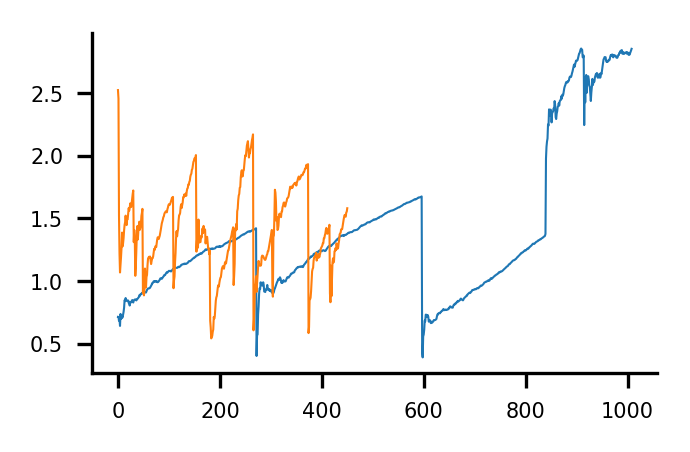

In [32]:
pl.plot(decay_trial_post_Rew_dhpc['tau'])
pl.plot(decay_trial_post_Rew_vhpc['tau'])

(array([  14.,   18.,   49.,  104.,  109.,   74.,   56.,   23.,    2.,    2.]),
 array([ 0.54249573,  0.74075347,  0.93901121,  1.13726895,  1.33552669,
         1.53378443,  1.73204217,  1.93029991,  2.12855765,  2.32681539,
         2.52507313]),
 <a list of 10 Patch objects>)

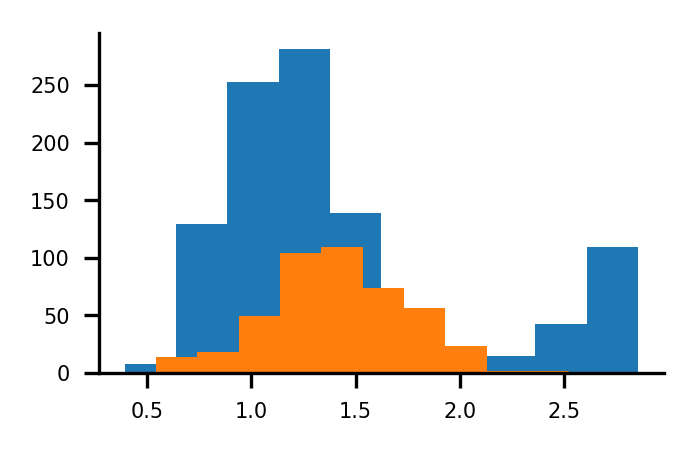

In [33]:
pl.hist(decay_trial_post_Rew_dhpc['tau'])
pl.hist(decay_trial_post_Rew_vhpc['tau'])

(array([  16.,   40.,   84.,  137.,  127.,   55.,   26.,    9.,    7.,   41.]),
 array([ 0.44574078,  0.70252722,  0.95931366,  1.21610011,  1.47288655,
         1.72967299,  1.98645943,  2.24324587,  2.50003232,  2.75681876,
         3.0136052 ]),
 <a list of 10 Patch objects>)

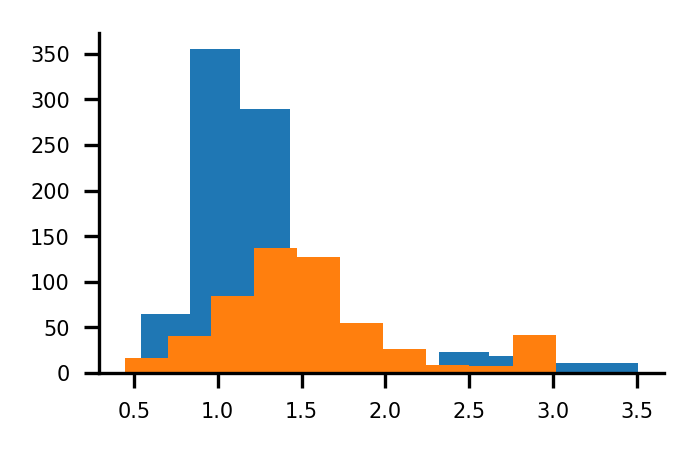

In [98]:
pl.hist(decay_trial_expo_Rew_dhpc['tau'])
pl.hist(decay_trial_expo_Rew_vhpc['tau'])

In [31]:
print np.mean(decay_trial_post_Rew_vhpc['tau'])
print np.mean(decay_trial_post_Rew_dhpc['tau'])

1.41261161418
1.4035660871


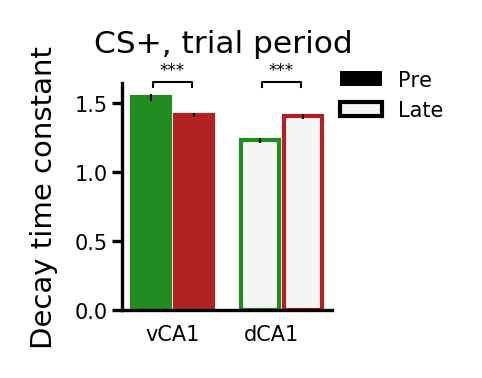

In [85]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Pre','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_expo_Rew_%s['tau']"%r),eval("decay_trial_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

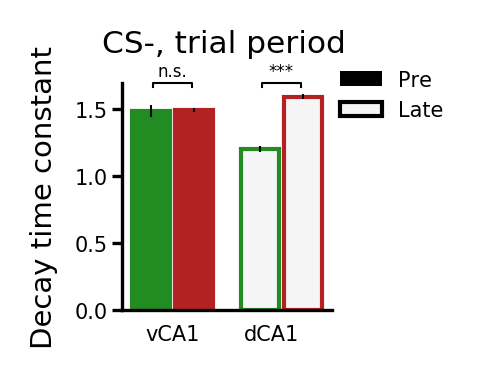

In [149]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_CSm_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_CSm_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_CSm_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_CSm_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_CSm_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_CSm_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Pre','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_expo_CSm_%s['tau']"%r),eval("decay_trial_post_CSm_%s['tau']"%r),
        -.2+i,0.2+i,1.7,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

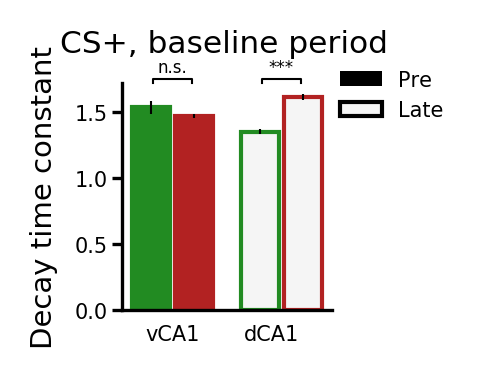

In [146]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['expo','post'],[dark_co[0],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Pre','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_base_expo_Rew_%s['tau']"%r),eval("decay_base_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.75,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS, baseline period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

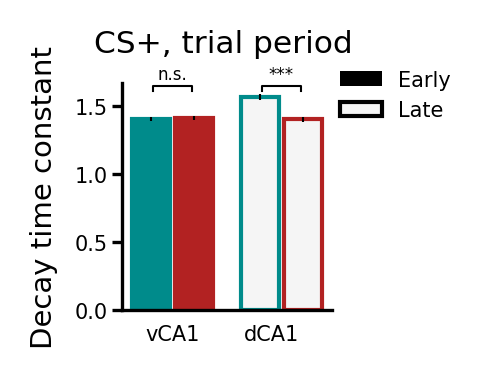

In [87]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_pre_Rew_%s['tau']"%r),eval("decay_trial_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

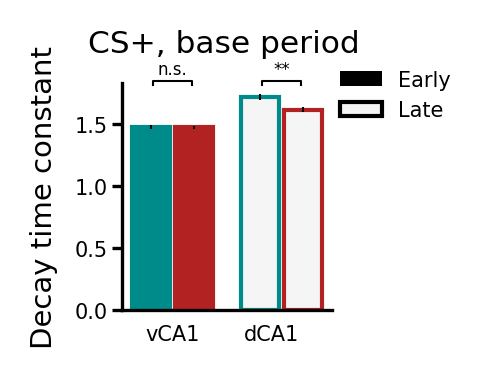

In [88]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_base_pre_Rew_%s['tau']"%r),eval("decay_base_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.85,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, base period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

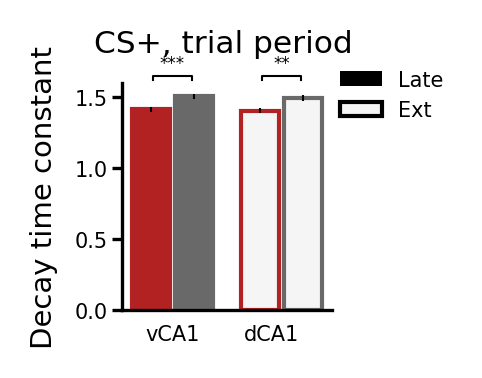

In [137]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['post','ext2'],[dark_co[2],dark_co[-2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Late','Ext'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("decay_trial_post_Rew_%s['tau']"%r),eval("decay_trial_ext2_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

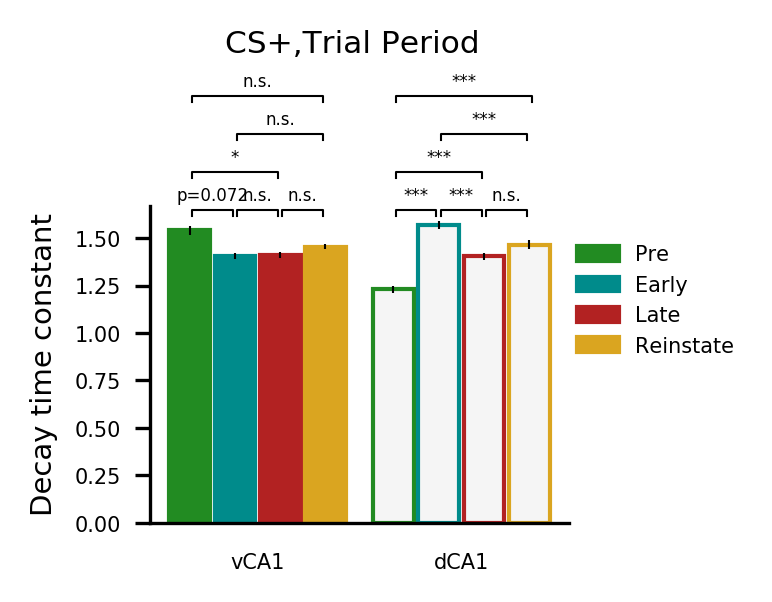

In [139]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['expo','pre','post','renew'],[dark_co[0],dark_co[1],dark_co[2],dark_co[-1]],range(4),['Pre','Early','Late','Reinstate']):
    v[sess] = np.array(np.std(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(i, np.mean(eval("decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(i+4.5, np.mean(eval("decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])

ax.set_ylabel('Decay time constant')
#ax.set_title('Decoding During CS')
#ax.set_ylim(1,1.65)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['expo','pre','post','renew']
for i in range(3):
    pvs.append(add_significance(ax, eval("decay_trial_%s_Rew_vhpc['tau']"%sessi[i]), eval("decay_trial_%s_Rew_vhpc['tau']"%sessi[i+1]),
        i+.05,i+.95,1.65,mcc=3))
    pvs.append(add_significance(ax, eval("decay_trial_%s_Rew_dhpc['tau']"%sessi[i]), eval("decay_trial_%s_Rew_dhpc['tau']"%sessi[i+1]),
        i+4.55,i+5.45,1.65,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, eval("decay_trial_%s_Rew_vhpc['tau']"%sessi[i]), eval("decay_trial_%s_Rew_vhpc['tau']"%sessi[i+2]),
        i+.05,i+1.95,1.85+i*.2,mcc=3))
    pvs.append(add_significance(ax, eval("decay_trial_%s_Rew_dhpc['tau']"%sessi[i]), eval("decay_trial_%s_Rew_dhpc['tau']"%sessi[i+2]),
        i+4.55,i+6.45,1.85+i*.2,mcc=3))   
pvs.append(add_significance(ax, eval("decay_trial_%s_Rew_vhpc['tau']"%sessi[0]), eval("decay_trial_%s_Rew_vhpc['tau']"%sessi[3]),
        .05,2.95,2.25,mcc=3))
pvs.append(add_significance(ax, eval("decay_trial_%s_Rew_dhpc['tau']"%sessi[0]), eval("decay_trial_%s_Rew_dhpc['tau']"%sessi[3]),
        4.55,7.55,2.25,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc['expo'][:loops], baseline_scores_tb_6_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+,Trial Period',y=1.3,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

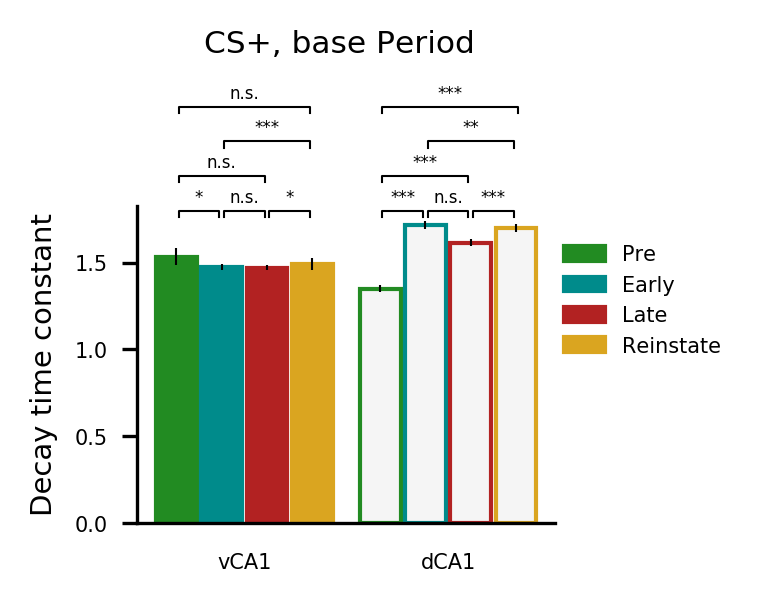

In [129]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['expo','pre','post','renew'],[dark_co[0],dark_co[1],dark_co[2],dark_co[-1]],range(4),['Pre','Early','Late','Reinstate']):
    v[sess] = np.array(np.std(eval("decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(i, np.mean(eval("decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(eval("decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(i+4.5, np.mean(eval("decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])

ax.set_ylabel('Decay time constant')
#ax.set_title('Decoding During CS')
#ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['expo','pre','post','renew']
ii=.15  # constant to add to y-position of all stat comparison bars
for i in range(3):
    pvs.append(add_significance(ax, eval("decay_base_%s_CSm_vhpc['tau']"%sessi[i]), eval("decay_base_%s_CSm_vhpc['tau']"%sessi[i+1]),
        i+.05,i+.95,ii+1.65,mcc=3))
    pvs.append(add_significance(ax, eval("decay_base_%s_CSm_dhpc['tau']"%sessi[i]), eval("decay_base_%s_CSm_dhpc['tau']"%sessi[i+1]),
        i+4.55,i+5.45,ii+1.65,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, eval("decay_base_%s_CSm_vhpc['tau']"%sessi[i]), eval("decay_base_%s_CSm_vhpc['tau']"%sessi[i+2]),
        i+.05,i+1.95,ii+1.85+i*.2,mcc=3))
    pvs.append(add_significance(ax, eval("decay_base_%s_CSm_dhpc['tau']"%sessi[i]), eval("decay_base_%s_CSm_dhpc['tau']"%sessi[i+2]),
        i+4.55,i+6.45,ii+1.85+i*.2,mcc=3))   
pvs.append(add_significance(ax, eval("decay_base_%s_CSm_vhpc['tau']"%sessi[0]), eval("decay_base_%s_CSm_vhpc['tau']"%sessi[3]),
        .05,2.95,ii+2.25,mcc=3))
pvs.append(add_significance(ax, eval("decay_base_%s_CSm_dhpc['tau']"%sessi[0]), eval("decay_base_%s_CSm_dhpc['tau']"%sessi[3]),
        4.55,7.55,ii+2.25,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc['expo'][:loops], baseline_scores_tb_6_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, base Period',y=1.3,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

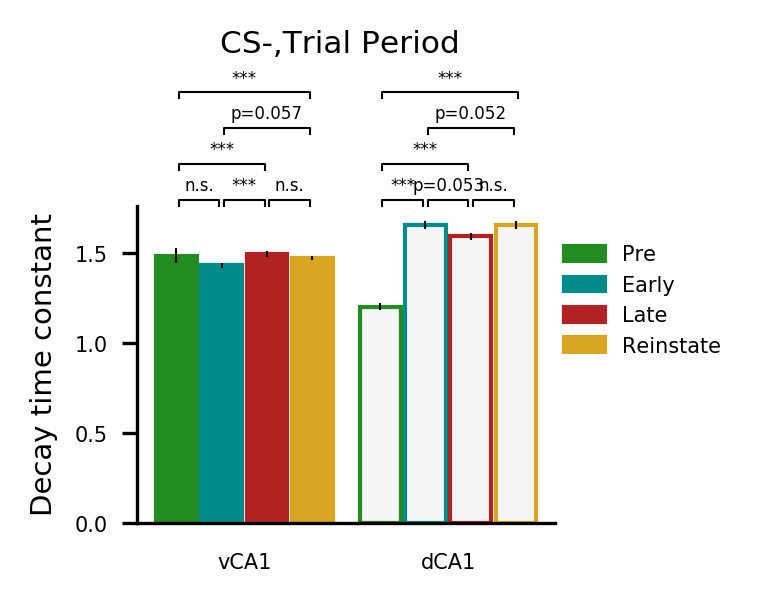

In [126]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['expo','pre','post','renew'],[dark_co[0],dark_co[1],dark_co[2],dark_co[-1]],range(4),['Pre','Early','Late','Reinstate']):
    v[sess] = np.array(np.std(eval("decay_trial_%s_CSm_vhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_CSm_vhpc['tau']"%sess))))
    ax.bar(i, np.mean(eval("decay_trial_%s_CSm_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(eval("decay_trial_%s_CSm_dhpc['tau']"%sess))/np.sqrt(len(eval("decay_trial_%s_CSm_dhpc['tau']"%sess))))
    ax.bar(i+4.5, np.mean(eval("decay_trial_%s_CSm_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])

ax.set_ylabel('Decay time constant')
#ax.set_title('Decoding During CS')
#ax.set_ylim(40,100)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['expo','pre','post','renew']
ii=.15  # constant to add to y-position of all stat comparison bars
for i in range(3):
    pvs.append(add_significance(ax, eval("decay_trial_%s_CSm_vhpc['tau']"%sessi[i]), eval("decay_trial_%s_CSm_vhpc['tau']"%sessi[i+1]),
        i+.05,i+.95,ii+1.65,mcc=3))
    pvs.append(add_significance(ax, eval("decay_trial_%s_CSm_dhpc['tau']"%sessi[i]), eval("decay_trial_%s_CSm_dhpc['tau']"%sessi[i+1]),
        i+4.55,i+5.45,ii+1.65,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, eval("decay_trial_%s_CSm_vhpc['tau']"%sessi[i]), eval("decay_trial_%s_CSm_vhpc['tau']"%sessi[i+2]),
        i+.05,i+1.95,ii+1.85+i*.2,mcc=3))
    pvs.append(add_significance(ax, eval("decay_trial_%s_CSm_dhpc['tau']"%sessi[i]), eval("decay_trial_%s_CSm_dhpc['tau']"%sessi[i+2]),
        i+4.55,i+6.45,ii+1.85+i*.2,mcc=3))   
pvs.append(add_significance(ax, eval("decay_trial_%s_CSm_vhpc['tau']"%sessi[0]), eval("decay_trial_%s_CSm_vhpc['tau']"%sessi[3]),
        .05,2.95,ii+2.25,mcc=3))
pvs.append(add_significance(ax, eval("decay_trial_%s_CSm_dhpc['tau']"%sessi[0]), eval("decay_trial_%s_CSm_dhpc['tau']"%sessi[3]),
        4.55,7.55,ii+2.25,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc['expo'][:loops], baseline_scores_tb_6_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-,Trial Period',y=1.3,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

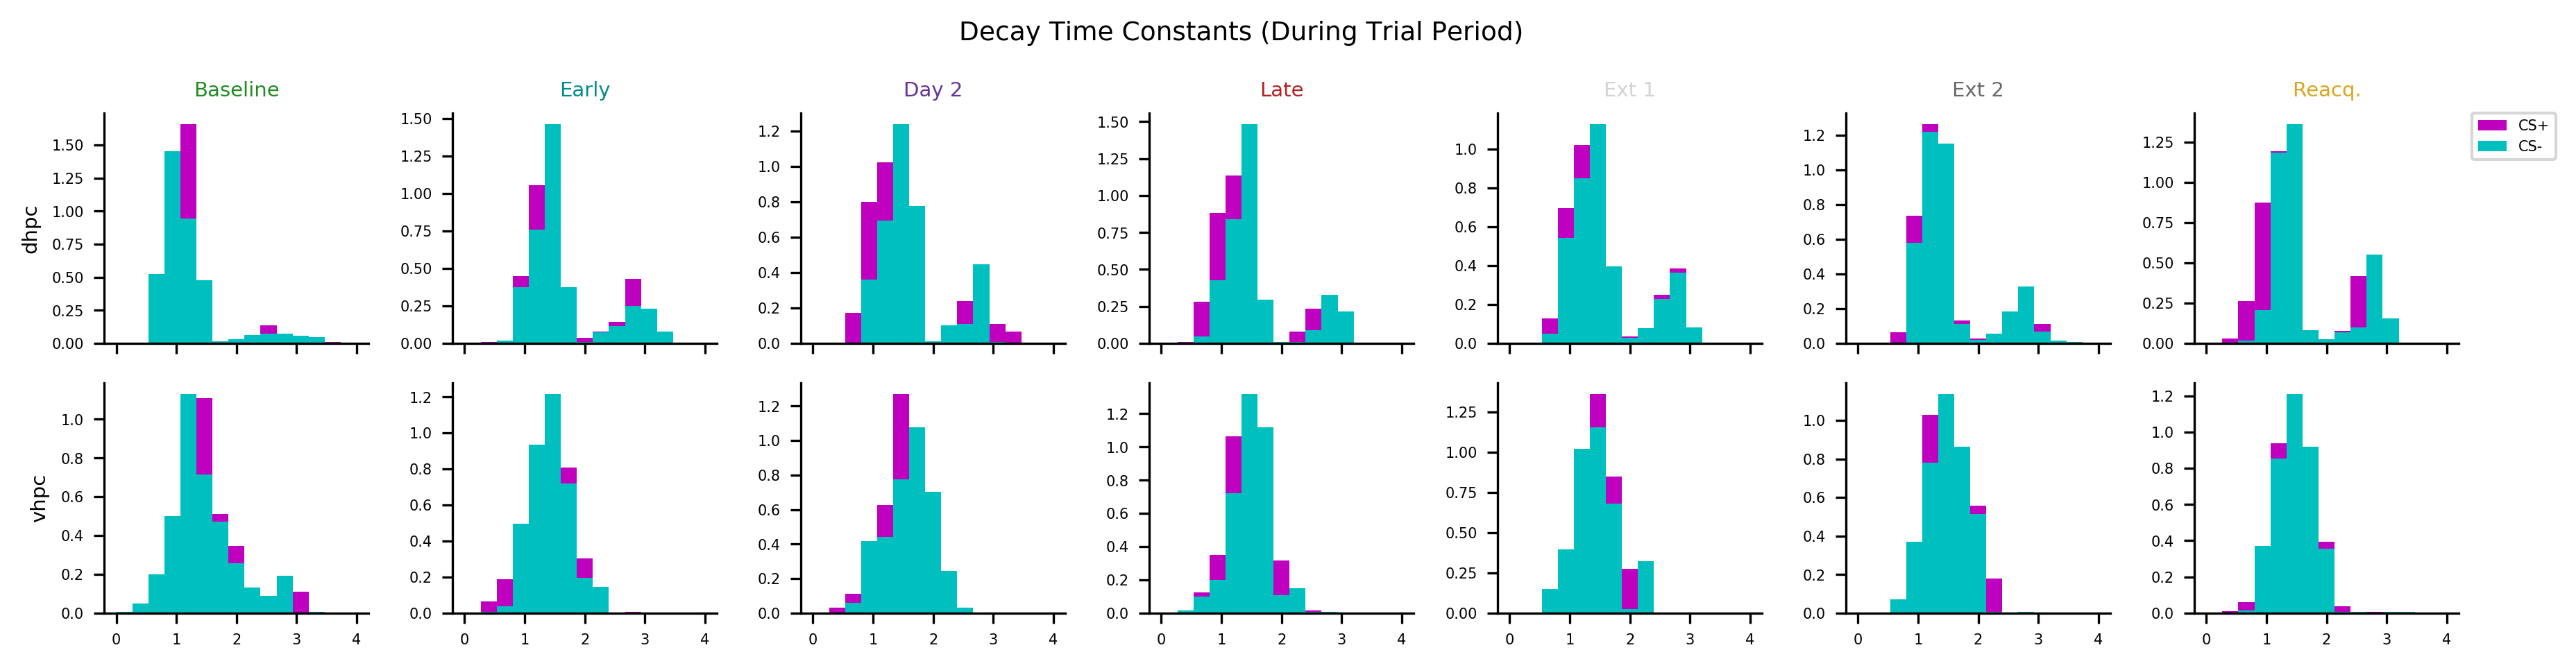

In [107]:
fig, ax = pl.subplots(2,7, figsize=(12, 3),sharex=True)

for comp,c,la in zip(['Rew','CSm'],['m','c'],['CS+','CS-']):
    for y,sess in zip(range(len(sessions)),sessions):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x][y].hist(eval("decay_trial_%s_%s_%s['tau']"%(sess,comp,reg)),normed=True,bins=15,range=(0,4),
                       color=c,label=la)

for x,reg in zip (range(2),['dhpc','vhpc']):
    for y in range(7):
        #ax[x][y].set_xlim(0,4)
        #ax[1][y].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(reg)
        ax[0][0].set_title('Baseline', color=dark_co_b[0])
        ax[0][1].set_title('Early', color = dark_co_b[1])
        ax[0][2].set_title('Day 2', color = dark_co_b[2])
        ax[0][3].set_title('Late', color = dark_co_b[3])
        ax[0][4].set_title('Ext 1', color = dark_co_b[4])
        ax[0][5].set_title('Ext 2', color = dark_co_b[5])
        ax[0][6].set_title('Reacq.', color = dark_co_b[6])
        ax[0][6].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Decay Time Constants (During Trial Period)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../final-ish figures/%s_dv.pdf'%NOTEBOOK_NAME)

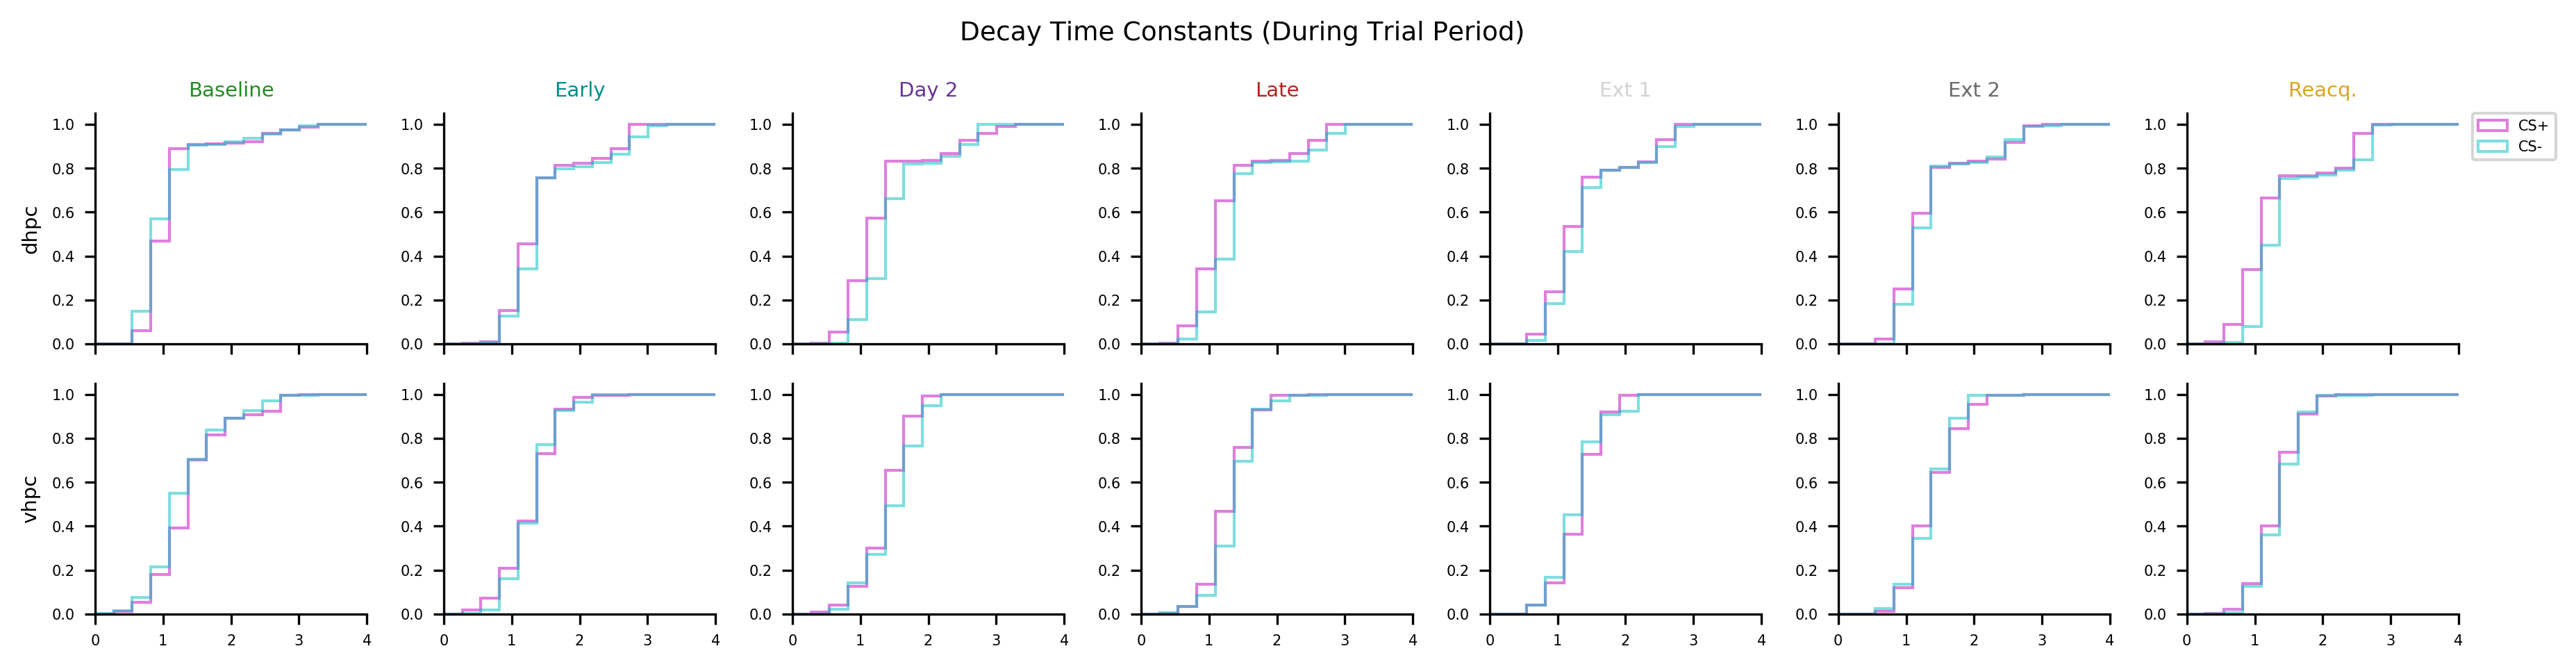

In [136]:
fig, ax = pl.subplots(2,7, figsize=(12, 3),sharex=True)

for comp,c,la in zip(['Rew','CSm'],['m','c'],['CS+','CS-']):
    for y,sess in zip(range(len(sessions)),sessions):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x][y].hist(eval("decay_trial_%s_%s_%s['tau']"%(sess,comp,reg)),cumulative=True,normed=True,bins=15,range=(0,4.1),
                       color=c,alpha=.5,label=la,histtype='step')

for x,reg in zip (range(2),['dhpc','vhpc']):
    for y in range(7):
        ax[x][y].set_xlim(0,4)
        #ax[1][y].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(reg)
        ax[0][0].set_title('Baseline', color=dark_co_b[0])
        ax[0][1].set_title('Early', color = dark_co_b[1])
        ax[0][2].set_title('Day 2', color = dark_co_b[2])
        ax[0][3].set_title('Late', color = dark_co_b[3])
        ax[0][4].set_title('Ext 1', color = dark_co_b[4])
        ax[0][5].set_title('Ext 2', color = dark_co_b[5])
        ax[0][6].set_title('Reacq.', color = dark_co_b[6])
        ax[0][6].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Decay Time Constants (During Trial Period)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../final-ish figures/%s_dv.pdf'%NOTEBOOK_NAME)

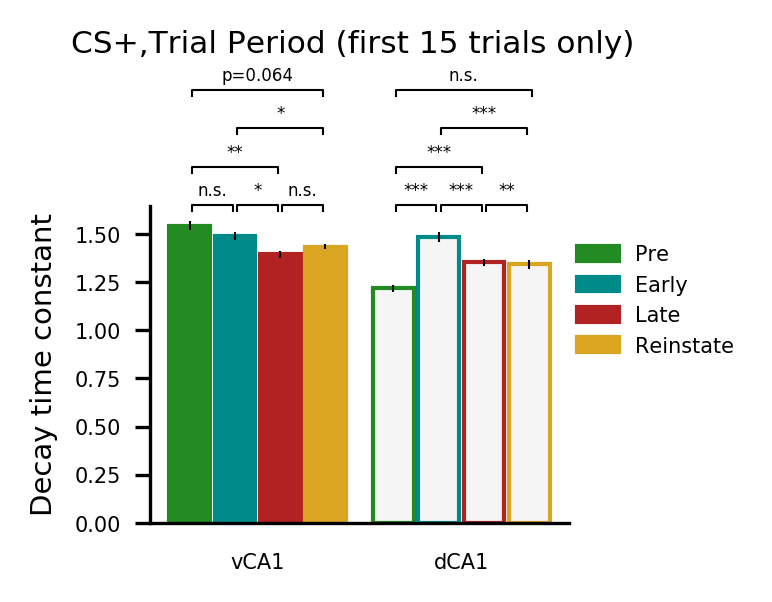

In [141]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['expo','pre','post','renew'],[dark_co[0],dark_co[1],dark_co[2],dark_co[-1]],range(4),['Pre','Early','Late','Reinstate']):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(i, np.mean(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(i+4.5, np.mean(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])

ax.set_ylabel('Decay time constant')
#ax.set_title('Decoding During CS')
#ax.set_ylim(1,1.65)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
sessi = ['expo','pre','post','renew']
for i in range(3):
    pvs.append(add_significance(ax, eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sessi[i]), eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sessi[i+1]),
        i+.05,i+.95,1.65,mcc=3))
    pvs.append(add_significance(ax, eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sessi[i]), eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sessi[i+1]),
        i+4.55,i+5.45,1.65,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sessi[i]), eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sessi[i+2]),
        i+.05,i+1.95,1.85+i*.2,mcc=3))
    pvs.append(add_significance(ax, eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sessi[i]), eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sessi[i+2]),
        i+4.55,i+6.45,1.85+i*.2,mcc=3))   
pvs.append(add_significance(ax, eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sessi[0]), eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sessi[3]),
        .05,2.95,2.25,mcc=3))
pvs.append(add_significance(ax, eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sessi[0]), eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sessi[3]),
        4.55,7.55,2.25,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc['expo'][:loops], baseline_scores_tb_6_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+,Trial Period (first 15 trials only)',y=1.3,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

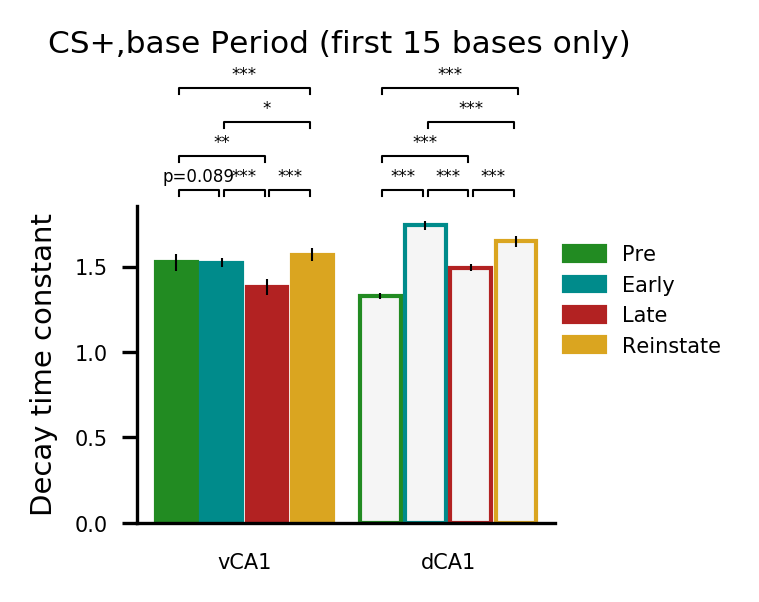

In [155]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(1.8,1.4))
for sess,c,i,lab in zip(['expo','pre','post','renew'],[dark_co[0],dark_co[1],dark_co[2],dark_co[-1]],range(4),['Pre','Early','Late','Reinstate']):
    v[sess] = np.array(np.std(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(i, np.mean(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess],label=lab)
    d[sess] = np.array(np.std(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(i+4.5, np.mean(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])

ax.set_ylabel('Decay time constant')
#ax.set_title('Decoding During CS')
#ax.set_ylim(1,1.65)
ax.set_xticks([1.5,6])
ax.set_xticklabels(['vCA1','dCA1'])
ax.legend(loc=(1,.5),frameon=False)
#ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

pvs=[]
ii=.3
sessi = ['expo','pre','post','renew']
for i in range(3):
    pvs.append(add_significance(ax, eval("first15_decay_base_%s_Rew_vhpc['tau']"%sessi[i]), eval("first15_decay_base_%s_Rew_vhpc['tau']"%sessi[i+1]),
        i+.05,i+.95,ii+1.65,mcc=3))
    pvs.append(add_significance(ax, eval("first15_decay_base_%s_Rew_dhpc['tau']"%sessi[i]), eval("first15_decay_base_%s_Rew_dhpc['tau']"%sessi[i+1]),
        i+4.55,i+5.45,ii+1.65,mcc=3))
for i in range(2):
    pvs.append(add_significance(ax, eval("first15_decay_base_%s_Rew_vhpc['tau']"%sessi[i]), eval("first15_decay_base_%s_Rew_vhpc['tau']"%sessi[i+2]),
        i+.05,i+1.95,ii+1.85+i*.2,mcc=3))
    pvs.append(add_significance(ax, eval("first15_decay_base_%s_Rew_dhpc['tau']"%sessi[i]), eval("first15_decay_base_%s_Rew_dhpc['tau']"%sessi[i+2]),
        i+4.55,i+6.45,ii+1.85+i*.2,mcc=3))   
pvs.append(add_significance(ax, eval("first15_decay_base_%s_Rew_vhpc['tau']"%sessi[0]), eval("first15_decay_base_%s_Rew_vhpc['tau']"%sessi[3]),
        .05,2.95,ii+2.25,mcc=3))
pvs.append(add_significance(ax, eval("first15_decay_base_%s_Rew_dhpc['tau']"%sessi[0]), eval("first15_decay_base_%s_Rew_dhpc['tau']"%sessi[3]),
        4.55,7.55,ii+2.25,mcc=3))

#for sess,i in zip(['expo','post'], range(2)):
#    pvs.append(add_significance(ax, baseline_scores_tb_6_CSp_vhpc['expo'][:loops], baseline_scores_tb_6_CSp_vhpc['post'][:loops],
#        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+,base Period (first 15 bases only)',y=1.3,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_CS_PrPoExRe_CSp.pdf'%NOTEBOOK_NAME)

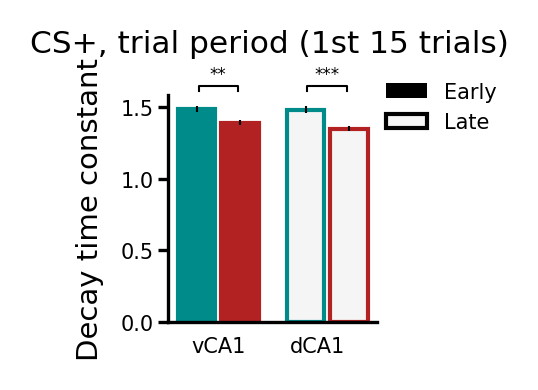

In [150]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_trial_pre_Rew_%s['tau']"%r),eval("first15_decay_trial_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period (1st 15 trials)',y=1.1,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

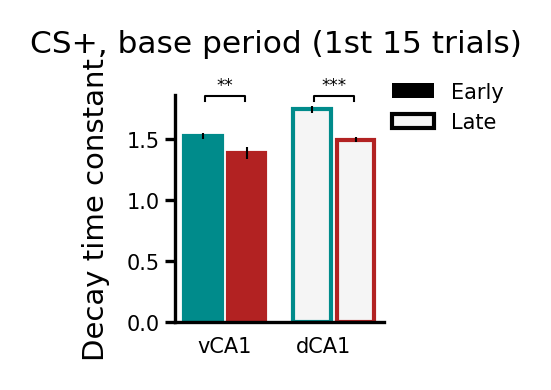

In [153]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_base_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_base_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_base_pre_Rew_%s['tau']"%r),eval("first15_decay_base_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.85,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, base period (1st 15 trials)',y=1.1,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

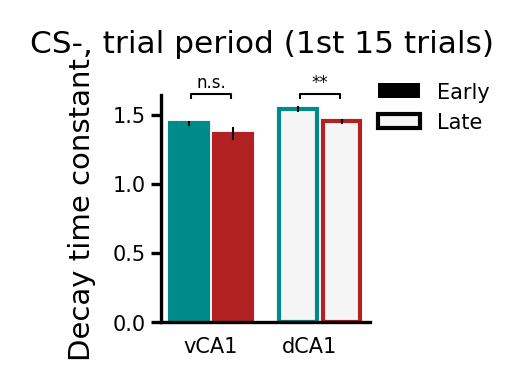

In [151]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['pre','post'],[dark_co[1],dark_co[2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_CSm_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_CSm_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_trial_%s_CSm_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_CSm_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_CSm_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_trial_%s_CSm_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Early','Late'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_trial_pre_CSm_%s['tau']"%r),eval("first15_decay_trial_post_CSm_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS-, trial period (1st 15 trials)',y=1.1,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

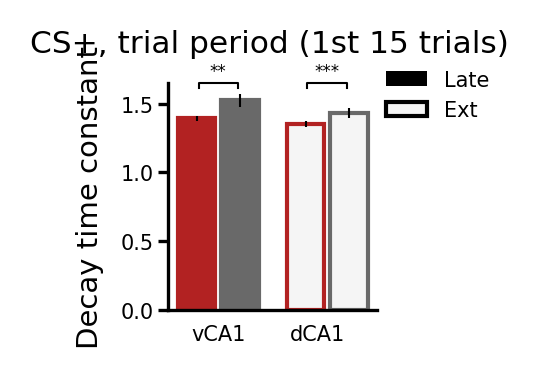

In [144]:
from matplotlib.patches import Patch
labels = ['vCA1','dCA1']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
to_plot = [0,2]
fig, ax = pl.subplots(figsize=(.9,1))
for sess,c,i in zip(['post','ext2'],[dark_co[2],dark_co[-2]],[-width/2-.03,+width/2+.03]):
    v[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess))))
    ax.bar(0 + i, np.mean(eval("first15_decay_trial_%s_Rew_vhpc['tau']"%sess)), width, color=c, edgecolor=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))/np.sqrt(len(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess))))
    ax.bar(1.1 + i,  np.mean(eval("first15_decay_trial_%s_Rew_dhpc['tau']"%sess)), width,color='whitesmoke', edgecolor=c,yerr=d[sess])
#ax.hlines(50,-.5,1.6, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etcsess
ax.set_ylabel('Decay time constant')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
#ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['Late','Ext'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for r,i in zip(['vhpc','dhpc'], [0,1.1]):
    pvs.append(add_significance(ax, eval("first15_decay_trial_pre_Rew_%s['tau']"%r),eval("first15_decay_trial_post_Rew_%s['tau']"%r),
        -.2+i,0.2+i,1.65,sig_func='ttest'))
        #max(np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_8_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_8_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_8_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('CS+, trial period (1st 15 trials)',y=1.06,fontsize=7.5)

#fig.savefig('../final-ish figures/%s_gmin_bars_tr_ExPo_CSp.pdf'%NOTEBOOK_NAME)

In [696]:
save_workspace(db)

Could not store variable 'matplotlib'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
